In [1]:
# Import Packages
# ---------------
#
# To begin, import the needed packages. You will use a combination of several EarthPy
# modules including spatial and plot.

import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

C:\Users\mac\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


In [2]:
file_path = 'C:/Users/mac/Documents/Python_Rasterio/AbayaLake/'

In [3]:
# Stack the landsat bands
# This creates a numpy array with each "layer" representing a single band

landsat_paths = glob(
    "C:/Users/mac/Documents/Python_Rasterio/AbayaLake/LC08_L1TP_169056_20190312_20190325_01_T1_b*[1-7]*.tif"
     )

landsat_paths.sort()
array_stack, meta = es.stack(landsat_paths, nodata=-9999)

In [6]:
# Calculate Normalized Difference Vegetation Index (NDVI)
# -------------------------------------------------------
#
# You can calculate NDVI for your dataset using the
# ``normalized_diff`` function from the ``earthpy.spatial`` module.
# Math will be calculated (b1-b2) / (b1 + b2).

# Landsat 8 red band is band 4 at [3]
# Landsat 8 near-infrared band is band 5 at [4]
titles = ["Ultra Blue", "Blue", "Green", "Red", "NIR", "SWIR 1", "SWIR 2"]
ndvi = es.normalized_diff(array_stack[4], array_stack[3])

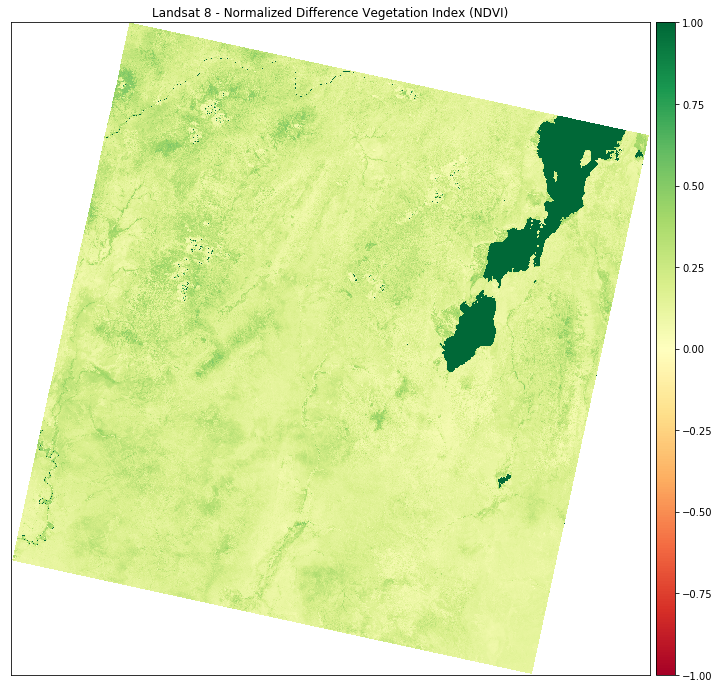

In [7]:
# Plot NDVI With Colorbar Legend of Continuous Values
# ----------------------------------------------------
#
# You can plot NDVI with a colorbar legend of continuous values using the
# ``plot_bands`` function from the ``earthpy.plot`` module.

titles = ["Landsat 8 - Normalized Difference Vegetation Index (NDVI)"]

# Turn off bytescale scaling due to float values for NDVI
ep.plot_bands(
    ndvi, cmap="RdYlGn", cols=1, title=titles, scale=False, vmin=-1, vmax=1
)

In [8]:
# Classify NDVI
# -------------
#
# Next, you can categorize (or classify) the NDVI results into useful classes.
# Values under 0 will be classified together as no vegetation. Additional classes
# will be created for bare area and low, moderate, and high vegetation areas.

# Create classes and apply to NDVI results
ndvi_class_bins = [-np.inf, 0, 0.1, 0.25, 0.4, np.inf]
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(np.ma.getmask(ndvi), ndvi_landsat_class)
np.unique(ndvi_landsat_class)

masked_array(data=[2, 3, 4, 5, --],
             mask=[False, False, False, False,  True],
       fill_value=999999,
            dtype=int64)

In [10]:
# Plot Classified NDVI With Categorical Legend - EarthPy Draw_Legend()
# --------------------------------------------------------------------
#
# You can plot the classified NDVI with a categorical legend using the
# ``draw_legend()`` function from the ``earthpy.plot`` module.

# Define color map
nbr_colors = ["gray", "y", "yellowgreen", "g", "darkgreen"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "No Vegetation",
    "Bare Area",
    "Low Vegetation",
    "Moderate Vegetation",
    "High Vegetation",
]

In [11]:
# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()

In [12]:
# The mask returns a value of none in the classes. remove that
classes = classes[0:5]

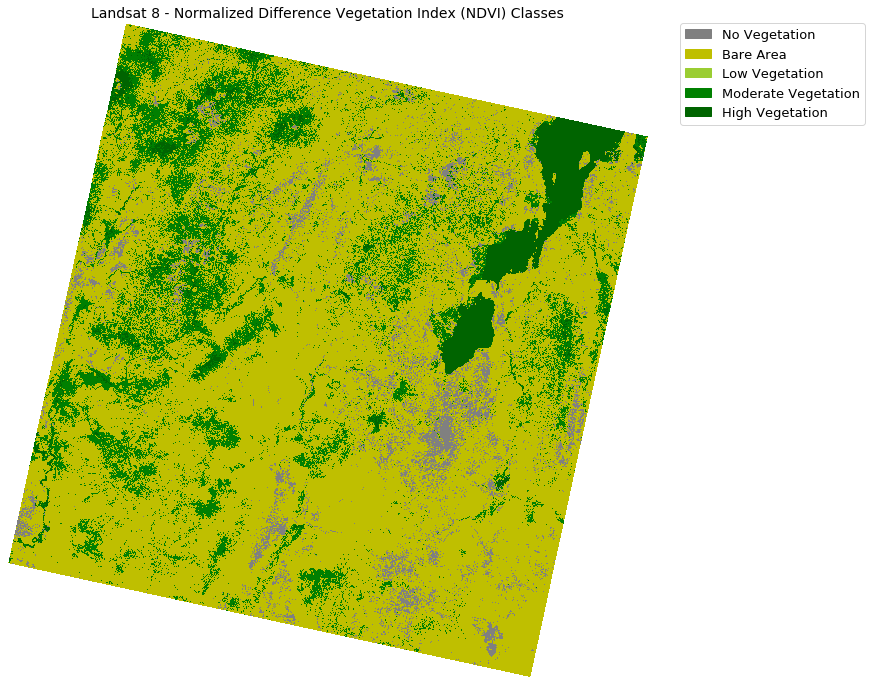

In [15]:
# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()
# Auto adjust subplot to fit figure size
plt.tight_layout()